In [210]:
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
data = []
with open("/home/matchulul/bin_packing/results/raw_output", 'r') as f:
    for line in f.readlines():
        data.insert(0, line.replace("First fit","First_fit").split()[1:])
        

In [212]:
s_data = []
with open("/home/matchulul/bin_packing/results/s_estimate", 'r') as f:
    for line in f.readlines():
        s_data.insert(0, line.split()[1:-1])

In [213]:
df = pd.DataFrame(data, columns=["#Experiments", "Algorithm",  "#objects", "AverageBins", "AverageTime"])
df[["#Experiments", "#objects", "AverageBins", "AverageTime"]] = df[["#Experiments", "#objects", "AverageBins", "AverageTime"]].apply(pd.to_numeric)

s_df = pd.DataFrame(s_data, columns=["Algorithm", "#objects", "SVal"])
s_df[["#objects", "SVal"]] = s_df[["#objects", "SVal"]].apply(pd.to_numeric)

In [214]:
first_fit_data = df.where(df.Algorithm == "First_fit").dropna().sort_values(by=['#objects'], ascending=True)
smart_fit_data = df.where(df.Algorithm == "Smart_first_fit").dropna().sort_values(by=['#objects'], ascending=True)

In [215]:
# The samples alternate on distribution, with uniforms first,
# but the uniforms often finish faster, leading to a confusing and hard 
# to graph result. also i forgot to print it out lol.
first_fit_data_uniform = first_fit_data[(first_fit_data.index % 4) == 1]
first_fit_data_normal = first_fit_data[(first_fit_data.index % 4) == 3]
smart_fit_data_uniform = smart_fit_data[smart_fit_data.index % 4 == 0]
smart_fit_data_normal = smart_fit_data[smart_fit_data.index % 4 == 2]


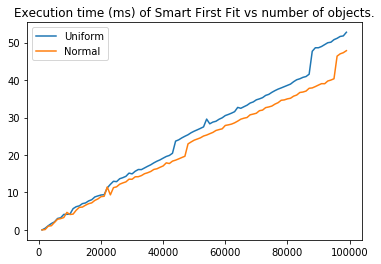

In [216]:
plt.figure()
unif, = plt.plot(smart_fit_data_uniform[["#objects"]],smart_fit_data_uniform[['AverageTime']].values.flatten(), label="Uniform")
norm, = plt.plot(smart_fit_data_normal[["#objects"]],smart_fit_data_normal[['AverageTime']].values.flatten(), label="Normal")
plt.title("Execution time (ms) of Smart First Fit vs number of objects.")
plt.legend(handles=[unif, norm])
plt.show()

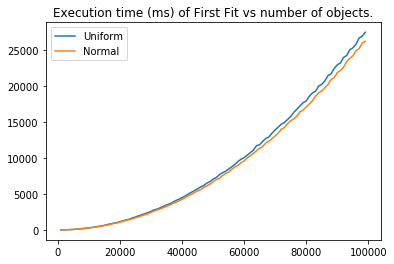

In [225]:
plt.figure()
unif, = plt.plot(first_fit_data_uniform[["#objects"]], first_fit_data_uniform[['AverageTime']].values.flatten(), label="Uniform")
norm, = plt.plot(first_fit_data_normal[["#objects"]], first_fit_data_normal[['AverageTime']].values.flatten(), label="Normal")
plt.title("Execution time (ms) of First Fit vs number of objects.")
plt.legend(handles=[unif, norm])
plt.show()

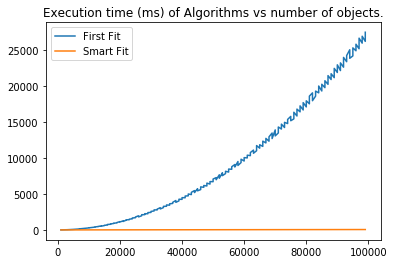

In [223]:
plt.figure()
first, = plt.plot(first_fit_data[["#objects"]],first_fit_data[['AverageTime']].values.flatten(), label="First Fit")
smart, = plt.plot(smart_fit_data[["#objects"]],smart_fit_data[['AverageTime']].values.flatten(), label="Smart Fit")
plt.title("Execution time (ms) of Algorithms vs number of objects.")
plt.legend(handles=[first, smart])
plt.show()

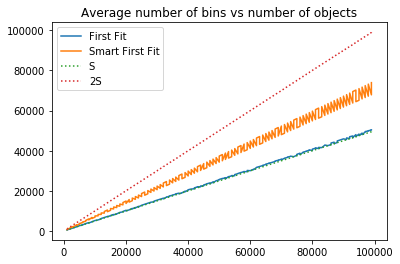

In [218]:
plt.figure()
unif, = plt.plot(first_fit_data[["#objects"]], first_fit_data[['AverageBins']].values.flatten(), label="First Fit")
norm, = plt.plot(smart_fit_data[["#objects"]], smart_fit_data[['AverageBins']].values.flatten(), label="Smart First Fit")
s, = plt.plot(s_df[["#objects"]], s_df[["SVal"]], label="S", linestyle=":")
s2, = plt.plot(s_df[["#objects"]], s_df[["SVal"]]*2, label="2S", linestyle=":")
plt.title("Average number of bins vs number of objects")
plt.legend(handles=[unif, norm, s, s2])
plt.show()

In [231]:
a = first_fit_data[['AverageTime']].values.flatten()/smart_fit_data[['AverageTime']].values.flatten()
np.average(a[3:])

/home/matchulul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


295.78851991897022